### KDE(Kernel Distribution estimation)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


C:\Users\DooDoo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


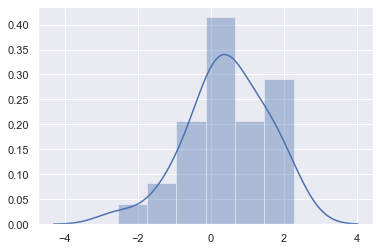

In [1]:
# use seaborn displot()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x);

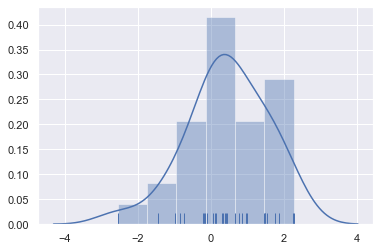

In [2]:
#show how dist data are distributed
sns.distplot(x, rug=True)

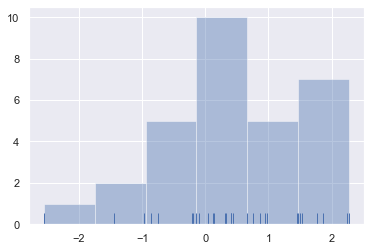

In [3]:
sns.distplot(x, kde=False, rug=True)

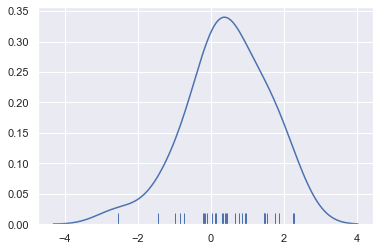

In [4]:
sns.distplot(x, hist=False, rug=True)

#### Practice on using Gaussian Kernel Function

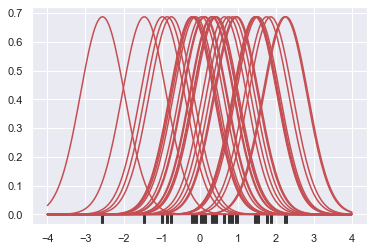

In [5]:
from scipy import stats

#x = np.random.normal(0,1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1/5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')

sns.rugplot(x, color=".2", linewidth=3)

In [6]:
len(stats.norm(3, bandwidth).pdf(support))

200

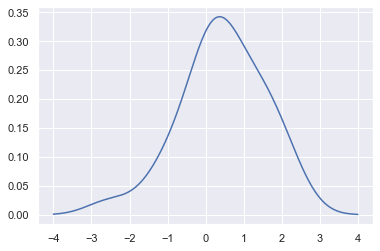

In [7]:
from scipy.integrate import trapz

density = np.sum(kernels, axis=0)
#normalize
density /= trapz(density, support)
plt.plot(support, density)

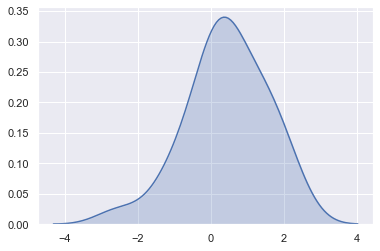

In [8]:
# can also use kdeplot
sns.kdeplot(x, shade=True)

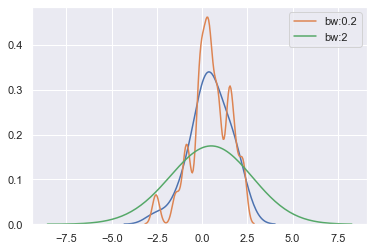

In [9]:
#by bandwidth
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw:0.2')
sns.kdeplot(x, bw=2, label='bw:2')
plt.legend();

### MeanShift using sklearn

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels=meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2 3 4 5 6 7]


In [11]:
#increase bandwidth a little bit
meanshift = MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


### Calculate the efficient bandwidth

In [12]:
from sklearn.cluster import estimate_bandwidth

#quantile parameter will take some data out to make computation faster, the higher the more data not included 
bandwidth = estimate_bandwidth(X, quantile=0.25)
print('bandwidth value:', round(bandwidth, 3))

bandwidth value: 1.689


In [13]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels class:', np.unique(cluster_labels))

C:\Users\DooDoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass bandwidth=1.6889636737559222 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cluster labels class: [0 1 2]


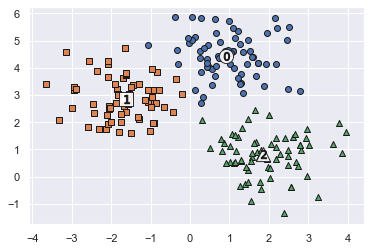

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    #use different marker for each cluster
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [15]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64


In [ ]:
#meanshift is sensitive for bandwidth, used well for image detection/tracking